# Introduction 
# project name: concretes data
# Group member:

1.GIRITUZE IRADUKUNDA Mireille\
2.ISHIME Redempta Blandine\
3.KITIO TSAGUE Angelo\
4.AKAZAN Ange-clement\
5.MUNEZERO Jeanette\
6.NYIRAMARITETE Donatha


Normally we our topic was specifically asking us to predict the strength of the Concrete. We had firstly tried to understand what term concrete means: Concrete is building material made by mixture of gravel, cement and water.

In addition reading the dataset given we have tried to understand each element of the dataset one by one that we can understand which one  to be the output which one could be features.

# Flast Furnace slag:
It is a ground granulated iron slag from reduction of iron ore,they are like small stones from reduction of iron ore.
# Flash ash
It is a coal combustible product but some regions extract it from lake or oceans and are the best to make concrete because of the strongest bond.
# Superplasticizer
Are additive used in making high strength concrete.
# Coarse Aggregate
They are irregular and granular materials,they are crushed to the size between 3/8 and 1.5 inches(Gravel)
# Fine aggregate
They are natural sand particles from the land it has size of 1/4 or even smaller in size.

After getting the explanations we have seen that all the above features contributes to the strength of the concrete so decided strength to be dependent variable.

Furthermore we discussed what we think to be the factors affecting the strength of the concrete that we can match it with the final results of our model.
Among the factors are water to cement ratio,little amount of sand.....


# To read our data set we need to import some packages as below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


# Reading our data and the name given is concret_data

In [2]:
df=pd.read_csv("concrete_data.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'concrete_data.csv'

# Explanation of our dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


No value is missing; so we don't have to remove the missing values.

In [14]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Our regression model will be based on the input and the output variables. Here we can guess that, our outing(dependant) variable is "Strength" since the strength of concretes depends on all of the others features 

# matrix correlation (to find the strong correlation)

In [15]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Looking at the matrix correlation, three features have the best correlations with the the outing variables "Strength":
- Cement 
-Superplasticizer
-Age\
They will represent our independant variables. 
So, in this case we are going to do a multiple regression since we have more than one independant variable. 


# Scatter plots of each  feature against strength

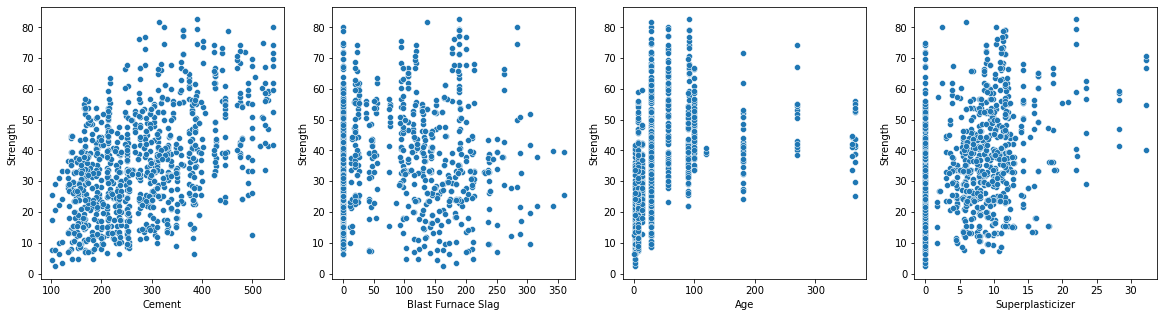

In [5]:
#scatter plot of 
fig, axs = plt.subplots(ncols=4, figsize = (20, 5))
sns.scatterplot(data=df, x="Cement",y="Strength",ax=axs[0])
sns.scatterplot(data=df, x="Blast Furnace Slag",y="Strength",ax=axs[1])
sns.scatterplot(data=df, x="Age",y="Strength",ax=axs[2])
sns.scatterplot(data=df, x="Superplasticizer",y="Strength",ax=axs[3])
plt.show()

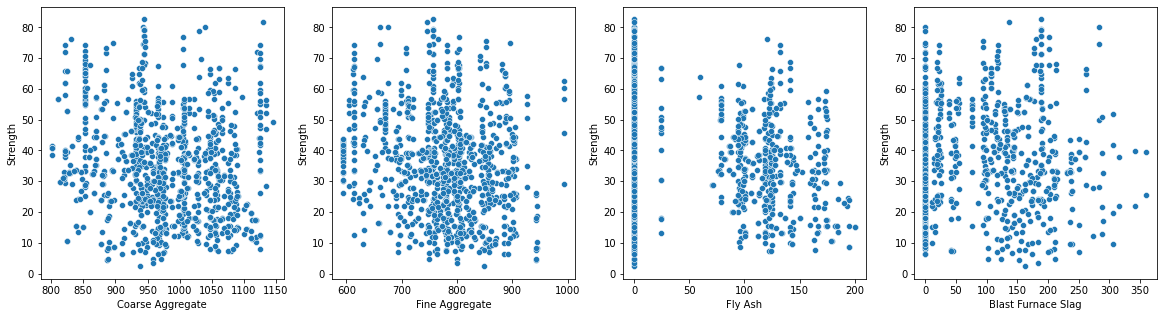

In [6]:
fig, axs = plt.subplots(ncols=4, figsize = (20, 5))
sns.scatterplot(data=df, x="Coarse Aggregate",y="Strength",ax=axs[0])
sns.scatterplot(data=df, x="Fine Aggregate",y="Strength",ax=axs[1])
sns.scatterplot(data=df, x="Fly Ash",y="Strength",ax=axs[2])
sns.scatterplot(data=df, x="Blast Furnace Slag",y="Strength",ax=axs[3])
plt.show()

# Selection of our features and predicted function

In [7]:
X=df[["Age","Cement","Superplasticizer"]].values.reshape(-1,3)
y=df["Strength"].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# creation of our linear regression
reg=linear_model.Ridge(alpha=0.5)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

Coefficients: 
 [[0.1005188  0.06512388 1.12972314]]
intercept: 
 [6.16418849]
Mean squared error: 118.52


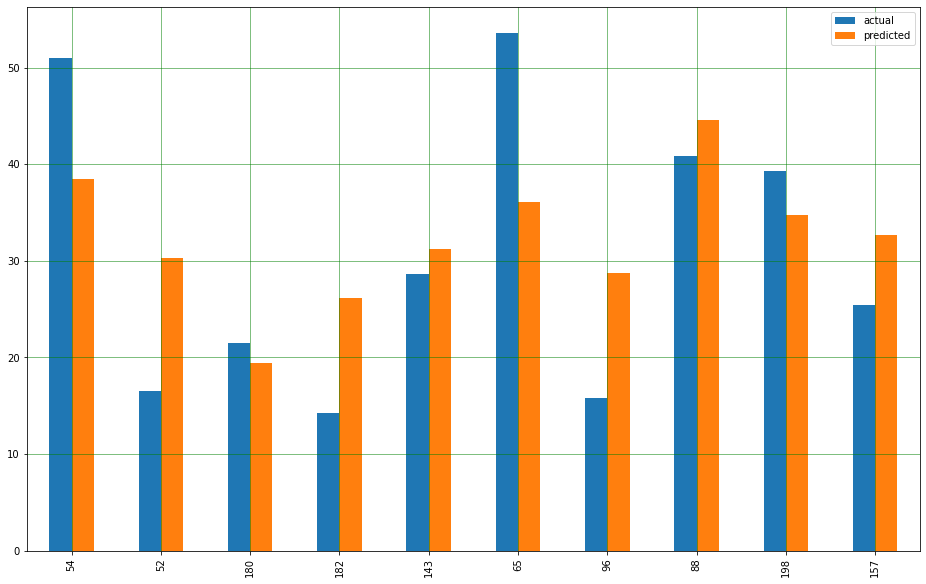

In [8]:
# The coefficients
print('Coefficients: \n', reg.coef_)
print('intercept: \n', reg.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
d = {"actual":y_test.ravel(), "predicted":y_pred.ravel()}
df1 = pd.DataFrame(d).sample(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Testing of the predicted function

Here we are going ot check if our predicted function gives values closed to the expected values

In [9]:
ypred=reg.predict([[32,500,2.5]])
ypred

array([[44.76703893]])

In [10]:
# using of coefficients and the intercept
y=6.16418849+32*0.1005188 +500*0.06512388+2.5*1.12972314
y

44.767037939999994

# Errors

In [11]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.71520192739852
Mean Squared Error: 118.52476294871522
Root Mean Squared Error: 10.886907869028525
R-squared: 0.5499851023645662


 # The mean square error proves that our model is efficient and can be used to predict the srength of concretes which  values are not in out data set.

# Below is the data set comparing the predicted values and the actual values

In [61]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


,Actual,Predicted
0,26.06,39.027686
1,10.35,14.852008
2,79.30,52.030107
3,74.99,42.973381
4,9.69,16.690194
...,...,...
201,27.53,28.971747
202,33.76,40.767579
203,33.01,26.213646
204,33.72,31.689788
